# week 7

### 1.1 다음 코드를 실행해서 데이터 프레임을 생성하세요

In [8]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

### 1.2 데이터 프레임을 확인하고, X= calory, breakfast, lunch, dinner, exercise / y=body shape로 변수 분리하세요

In [12]:
print(df.head())
X = df.iloc[:,0:5]
y = df.iloc[:,-1]

   calory  breakfast  lunch  dinner  exercise body_shape
0    1200          1      0       0         2     Skinny
1    2800          1      1       1         1     Normal
2    3500          2      2       1         0        Fat
3    1400          0      1       0         3     Skinny
4    5000          2      2       2         0        Fat


### 1.3 X 데이터 값의 범위가 균일하지 않으므로 standard scaler를 이용해서 리스케일 해주세요

In [13]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

### 1.4 사이킷런 PCA 클래스를 이용해서 5차원 데이터를 1차원으로 변환하고 shape를 확인해주세요

In [21]:
from sklearn import decomposition
from sklearn.decomposition import PCA

obj_pca = PCA(n_components = 1)
X_pca = obj_pca.fit_transform(x_std)

In [22]:
X_pca.shape

(10, 1)

### 1.5 explained_variance_ratio_ 변수를 이용해서 보존된 변동성 비율을 확인해주세요

In [23]:
print(obj_pca.explained_variance_ratio_)

[0.73183217]


### 1.6 적절한 차원의 수 선택하기 - 원본 데이터셋의 분산을 95%로 유지하는데 필요한 최소한의 PC 개수 즉 차원 수 d를 구하세요

In [25]:
import numpy as np

pca = PCA()
pca.fit(x_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum > 0.95) + 1
d

4

### 1.7 n_components를 설정하여 PCA를 다시 실행하는 인자로 보존할 분산의 비율을 넣어주세요. (분산의 비율 : 0.95) 이를 X_reduced에 저장하세요 그 후 shape을 통해서 몇차원으로 압축되었는지 확인하세요

In [26]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_std)
X_reduced.shape

(10, 4)

### 1.8 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 다시 원래의 차원으로 되돌리세요 그 후 shape을 통해서 원래의 차원으로 잘 돌아왔는지 확인하세요

In [27]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(10, 5)

### 1.9 랜덤 PCA를 이용하여 데이터를 2차원으로 압축하세요. (random_state=42)




In [31]:
rnd_pca = PCA(n_components=2, svd_solver = "randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(x_std)

### 1.10 점진적 PCA를 이용하여 데이터를 4차원으로 압축하세요. (배치사이즈:2) 그 후 shape을 통해 확인하세요




In [32]:
from sklearn.decomposition import IncrementalPCA

In [34]:
n_batches = 2
inc_pca = IncrementalPCA(n_components=4)
for X_batch in np.array_split(x_std, n_batches):
    print(".", end="")
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(x_std)
X_reduced.shape

..

(10, 4)

### 1.11 커널 PCA를 이용하여 데이터를 2차원으로 압축하세요. (kernel="rbf",gamma=0.4) 그 후 shape을 통해 확인하세요


In [36]:
from sklearn.decomposition import KernelPCA

In [37]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.4)
X_reduced = rbf_pca.fit_transform(x_std)
X_reduced.shape

(10, 2)

### 1.12 커널 PCA의 하이퍼파라미터를 선택하세요 kPCA를 이용하여 2차원으로 축소하고 Logistic Regression으로 Classification을 진행하세요. 그 다음 가장 높은 accuracy를 얻기 위해 GridSearchCV를사용하여 kPCA에 가장 좋은 커널과 gamma 파라미터를 구하세요.
이때, kpca__kernel은 ["linear", "poly", "rbf", "sigmoid", "cosine"], kpca__gamma"은 np.linspace(0.03, 0.05, 1,2,10)


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [44]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)), 
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma" : [0.03, 0.05, 10],
    "kpca__kernel" : ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x_std, y)

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


### 2.1 다음 iris 데이터 세트를 출력해주세요

In [46]:
from sklearn.datasets import load_iris
iris=load_iris()
columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF=pd.DataFrame(iris.data, columns=columns)
irisDF['target']=iris.target

irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2.2 X 데이터 값을 standard scaler를 이용해서 표준화 해주세요

In [50]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

### 2.3 PCA를 이용해 4차원 데이터를 2차원으로 변환해주세요

In [53]:
from sklearn import decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(x_std)
X2D.shape

(150, 2)

### 2.4 PCA 변환된 데이터의 칼럼 명을 pca_component1, pca_component2로 명명해서 새로운 dataframe을 만들어주세요

In [57]:
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(X2D, columns=pca_columns)
irisDF_pca.head()

,pca_component_1,pca_component_2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### 2.5 원본 데이터와 PCA 데이터를 각각 XGBoost로 학습시키고 (random_state=15), cross_val_score()로 5개의 교차 검증 세트로 정확도를 비교해주세요

In [59]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


xgb_clf = XGBClassifier(random_state=15)
scores = cross_val_score(xgb_clf, iris.data, iris.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

xgb_clf = XGBClassifier(random_state=15)
scores = cross_val_score(xgb_clf, irisDF_pca, iris.target, scoring='accuracy', cv=5)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
원본 데이터 평균 정확도: 0.96
원본 데이터 교차 검증 개별 정확도: [0.9        0.93333333 0.83333333 0.83333333 1.        ]
원본 데이터 평균 정확도: 0.9


### 3.1 기본적인 LDA 구현을 위한 라이브러리를 import 해주세요. 와인 데이터도 로드해주세요.

In [60]:
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### 3.2 X에는 features를 y에는 target을 저장해주세요.

In [66]:
wine = load_wine()

X = wine.data
y = wine.target

### 3.3 X의 형태를 확인해주세요. (178,13)이 나와야합니다.

In [67]:
X.shape

(178, 13)

### 3.4 X의 행 5개를 확인해주세요.

In [68]:
X[0:5,:]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

### 3.5 target들의 종류를 확인해주세요.

In [74]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 3.6 X_lda에 lda를 fit해주세요. 

In [73]:
X_scaled = StandardScaler().fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_scaled, y)
X_lda = lda.transform(X_scaled)
print(X_lda.shape)

(178, 2)


### 3.7 2차원 평면에 표현해주세요. 교재 395페이지를 참조해주세요.

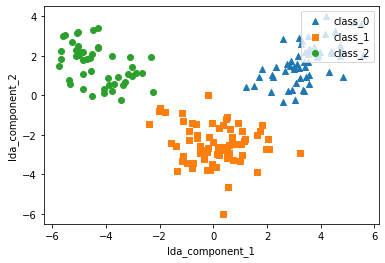

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
XDF_lda = pd.DataFrame(X_lda, columns=lda_columns)
XDF_lda['target']=wine.target

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = XDF_lda[XDF_lda['target']==i]['lda_component_1']
    y_axis_data = XDF_lda[XDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=wine.target_names[i])
    

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()